# Graphs

_Original Assignment by: Rick Quax_

_Adapted by: Tristan Laan_

**Name:** Jelle Sakkers
**UvANetID:** 14619946

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from numpy import nan
from sys import stderr
from math import factorial

Note: the hand-in notes are the same as the ODE exercise and are only repeated for the sake of completeness, **but the general and grading notes are different**.

## Hand-in notes
This assignment is partially auto-graded. This means we can check your solutions more quickly, but also means that your assignment must adhere to some format. To accomplish this, make sure you follow the following rules. **Please read these rules before starting the assignment.**

- Do **not** add or remove cells in this notebook. This can break the AutoTest. Note: if you accidentally create a new cell, you can safely delete the cell.

- **Only** edit cells that contain instructions to do so, more specifically only put your answers in cells that say "YOUR ANSWER/CODE HERE".

- Do **not** edit function names. This can break the AutoTest. You can however add helper functions, but make sure to put them in the same cells.

- Do **not** edit the cell tags. This can break the AutoTest.

- CodeGrade will run all cells in this notebook automatically, so please make sure that the notebook you hand in is cleared, i.e. select *Cell→All Outputs→Clear*.

- Don't worry if you do not manage to pass all asserts before you hand-in the assignment. CodeGrade will execute all the cells, even if there's an Exception.

- You should hand in a zip archive or tarball containing **only** this notebook and `graphs.py`. On Linux you can run the command `tar -czvf graphs-2023.tar.gz graphs-2023.ipynb graphs.py` to create a correct tarball.

- After submitting the notebook, **make sure** you passed the Hand-in check of the AutoTest. Also make sure the notebook in the AutoTest output (only visible after the AutoTest is completed) looks correct.

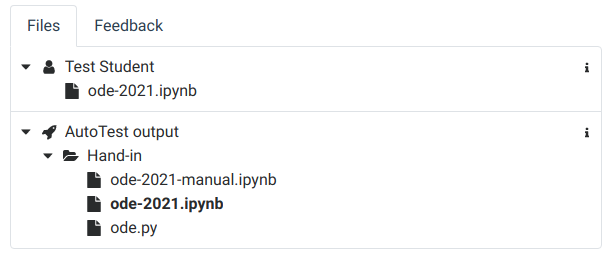
<p style="text-align: center; font-style: italic">Location of the AutoTest output in the CodeGrade Filebrowser</p>

- Do not use Jupyter alternatives, like Google Collab or VSCode, they are known to remove Cell metadata, which is needed for the AutoTest.


## Inserting Images
When you are asked to insert an image, you **must** embed them in the cell as attachment. You can do this by selecting *Edit→Insert Image* from the Toolbar in Jupyter. To view all attachments in a cell you can enable the Attachment cell toolbar by selecting *View→Cell Toolbar→Attachments*.
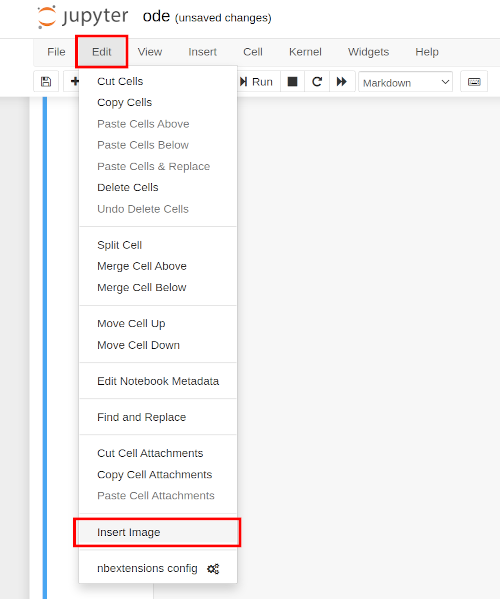
<p style="text-align: center; font-style: italic">Insert Image toolbar option</p>


## General notes
- The first part consists entirely of analytical questions. The second part is a combination of both analytical questions and programming exercises.

- When you are asked for a derivation or a solution then **always** show clearly the steps which you made to arrive at it. You can work it out on a notepad first, then type a clean version in your answer sheet. You can use $\LaTeX$ by enclosing it with `$`-signs, so: `$\LaTeX$`.

- When asked to enter numbers as fractions in a cell block, simply let python calculate the division, i.e. one-third should be entered as `1/3`.

- When asked to enter your analytical solution in a code cell, the function may have more parameters than needed. It is entirely possible that you have the correct solution while you don't use them all.

- Make sure you answer all parts of each question.

- **Always** label your axes in each figure. Unless stated otherwise, your plots should be generated using Python in this notebook.

- Because of the execution time of some of the networks, it is not feasible to run all the computations in this notebook. So sometimes you will be asked to implement a network or generate a plot in the provided Python file `graphs.py`.

## Grading notes
- The points for each part of a question are shown alongside every step; there are 170 points in total.

- Note that your plotting code is not directly graded. It is only used to verify that your code is functional and is not copied from someone else. However, if a (part of) your code is not functional, i.e. does not produce a given figure that you use in an answer, or if it is not structured/commented well enough for us to understand it, then you risk not receiving any points for the corresponding answer.

- You should hand in a zip archive or tarball containing **only** this notebook and `graphs.py`. On Linux you can run the command `tar -czvf graphs-2023.tar.gz graphs-2023.ipynb graphs.py` to create a correct tarball.

## Table of contents
- [0. Background material](#0.-Background-material)
- [1. Analytical questions](#1.-Analytical-questions)
  - [1.1 Undirected network](#1.1-Undirected-network)
  - [1.2 Random networks](#1.2-Random-networks)
  - [1.3 Sand avalanche](#1.3-Sand-avalanche)
- [2. Epidemic spreading](#2.-Epidemic-spreading)
  - [2.1 Susceptible-Infected model](#2.1-Susceptible-Infected-model)
  - [2.2 Creating a mean-field approximation](#2.2-Creating-a-mean-field-approximation)
  - [2.3 Evaluating mean-field approximation](#2.3-Evaluating-mean-field-approximation)
  - [2.4 Scale-free network](#2.4-Scale-free-network)

# 0. Background material
This notebook requires knowledge of the following skills.

- Basic graph theory.
- Binomial distribution.
- Centralities. The different types of centralities are briefly explained in [this slide deck](https://www.cl.cam.ac.uk/teaching/1213/L109/stna-lecture3.pdf), but feel free to search for other sources if you feel like it.

# 1. Analytical questions

## 1.1 Undirected network
Consider the following undirected network: 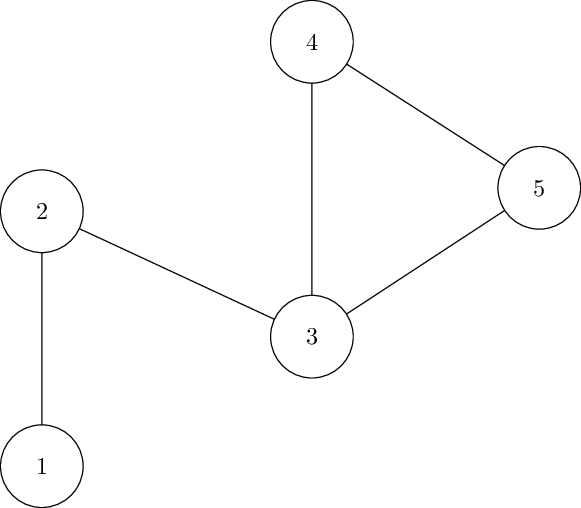

### 1.1 a. Histogram (2 points)
Enter the correct degrees (not normalised) per node and create a histogram.

In [4]:
h11a = [
        1,  # degree of node 1
        2,  # degree of node 2
        3,  # degree of node 3
        2,  # degree of node 4
        2   # degree of node 5
    ]

In [5]:
assert np.array(h11a).shape == (5, ), "array shape is incorrect"
assert np.isfinite(h11a).all(), "array contains NaN values"

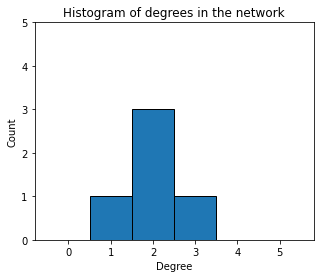

In [6]:
plt.figure(figsize=(5, 4))
plt.hist(h11a, np.linspace(-0.5, 5.5, 7), ec='black')

plt.xlabel("Degree")
plt.xticks([0, 1, 2, 3, 4, 5])
plt.yticks([0, 1, 2, 3, 4, 5])
plt.ylabel("Count")
plt.title("Histogram of degrees in the network")

plt.show()

### 1.1 b. Adjacency matrix (4 points)
Write the adjacency matrix of this network.

In [7]:
A11b = [
        [0, 1, 0, 0, 0],
        [1, 0, 1, 0, 0],
        [0, 1, 0, 1, 1],
        [0, 0, 1, 0, 1],
        [0, 0, 1, 1, 0],
    ]

In [8]:
assert np.array(A11b).shape == (5, 5), "array shape is incorrect"
assert np.isfinite(A11b).all(), "array contains NaN values"

### 1.1 c. Centrality (10 points)
Compute the following types of centrality for each vertex:
- Degree centrality (normalised by number of nodes)
- Closeness centrality (normalised by number of nodes)
- Betweenness centrality (normalised by number of pairs of vertices)

*Note:* For a 0.1pt bonus credit on the entire assigment, you can also compute the Eigenvector centality. You may use `numpy` or something similar for computing parts of this centrality, but of course no `networkx`!

If you do not remember some of these centralities, have a look at [this slide deck](https://www.cl.cam.ac.uk/teaching/1213/L109/stna-lecture3.pdf).

First show how you derived your answer, and then enter it in the code cell (as fraction, or rounded to 5 decimals if necessary).

YOUR DERIVATION HERE

In [9]:
# degree centrality
# distance matrix
deg_11c = [
        1/5,
        2/5,
        3/5,
        2/5,
        2/5
    ]

# closeness centrality
clos_11c = [
        nan,
        nan,
        nan,
        nan,
        nan
    ]

# betweenness centrality
bet_11c = [
        nan,
        nan,
        nan,
        nan,
        nan
    ]

# eigenvector centrality
# NB: leave this as is if you choose not to compute this centrality;
# you may ignore the corresponding error in the next cell in that case.
eig_11c = [
        nan,
        nan,
        nan,
        nan,
        nan
    ]

In [10]:
def _check_centrality(name, centrality):
    assert np.array(centrality).shape == (5,), f"array shape is incorrect of {name} centrality is wrong"
    assert np.isfinite(centrality).all(), f"array of {name} centrality contains NaN values"
        
_check_centrality("degree", deg_11c)
_check_centrality("closeness", clos_11c)
_check_centrality("betweenness", bet_11c)

try:
    _check_centrality("eigenvector", eig_11c)
except AssertionError as e:
    print(e, file=stderr)

AssertionError: array of closeness centrality contains NaN values

### 1.1 d. Matrix multiplication (4 points)
The vector of the degree per vertex can be obtained by a suitable, single matrix-vector multiplication. Implement this multiplication in the code block.

In [11]:
def degree_per_vertex(A):
    """Calculates the degree per vertex using a single matrix-vector multiplication.
    A is the adjacency matrix (as 2d numpy array)."""
    return ... @ ...  # YOUR CODE HERE (NOTE: @ is the numpy matrix multiplication operator)

In [12]:
print(degree_per_vertex(np.array(A11b)))

TypeError: unsupported operand type(s) for @: 'ellipsis' and 'ellipsis'

### 1.1 e. Directionalisation (4 points)
We can convert this undirected network to a directed one by choosing one of two possible directions for every edge. Prove that no such ‘directionalisation’ exists such that from all vertices you could reach (or infect) the entire network.

YOUR ANSWER HERE

### 1.1 f. Local clustering coefficient (7 points)
Compute the [local clustering coefficient](https://en.wikipedia.org/wiki/Clustering_coefficient) for every vertex. First show how you derived your answer, and then enter it in the code cell. Enter as fractions and replace divisions by zero with 0.

YOUR DERIVATION HERE

In [13]:
c11f = [
        nan,  # coefficient of node 1
        nan,  # coefficient of node 2
        nan,  # coefficient of node 3
        nan,  # coefficient of node 4
        nan   # coefficient of node 5
    ]

In [14]:
assert np.array(c11f).shape == (5,), "array shape is incorrect"
assert np.isfinite(c11f).all(), "array contains NaN values"

AssertionError: array contains NaN values

### 1.1 g. Connecting the nodes (4 points)
What is the minimum number of edges that must be added so that the clustering coefficient is 1 for every vertex? Why?

YOUR ANSWER HERE

## 1.2 Random networks
Consider a random (Erdős–Rényi) network of $N$ nodes and a probability $p$ per possible edge to be present in the network.

In [15]:
def binom_coefficients(n, k):
    """Calculates the binomial coefficient indexed by pair (n, k).
    Might be useful in this section."""
    return factorial(n) / (factorial(k) * factorial(n - k))

### 1.2 a. Probability distribution (5 points)
What is the expression for the probability distribution for the degree $k$ of a single vertex? Why is this the right type of probability distribution?

First derive and explain your answer, and then enter it in the code cell.

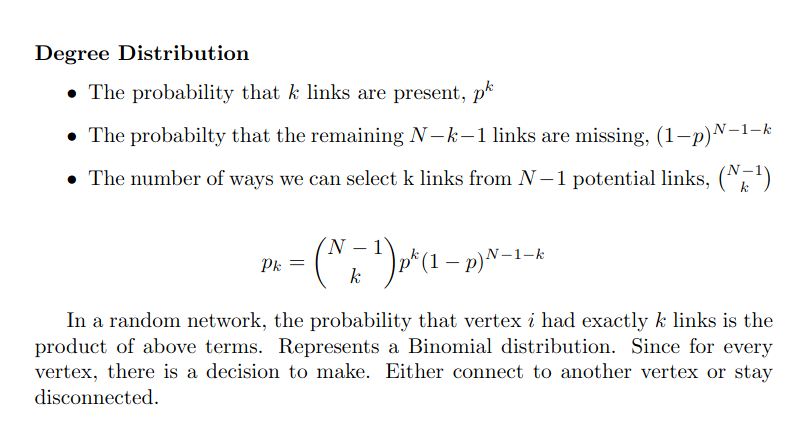

In [16]:
def prob12a(N, p, k):
    """Returns the probability of a vertex to have degree k in
    a random network of N nodes with a probability p per possible
    edge to be present in the network."""
    a = binom_coefficients(N-1, k)
    b = p ** k
    c = (1 - p) ** (N - 1 - k)
    return a * b * c

In [17]:
assert isinstance(prob12a(10, 0.2, 3), float), "Your function should return a float"

### 1.2 b. Clustering coefficient (7 points)
For a given vertex that has degree $k$, what is the expression for the probability that its clustering coefficient equals exactly $\frac{t}{k_{max}}, t \in \mathbb{N}$? (Remember that $k_{max}=\frac{k(k-1)}{2}$.) You can assume that $t \leq k_{max}.$

First derive your answer, and then enter it in the code cell.

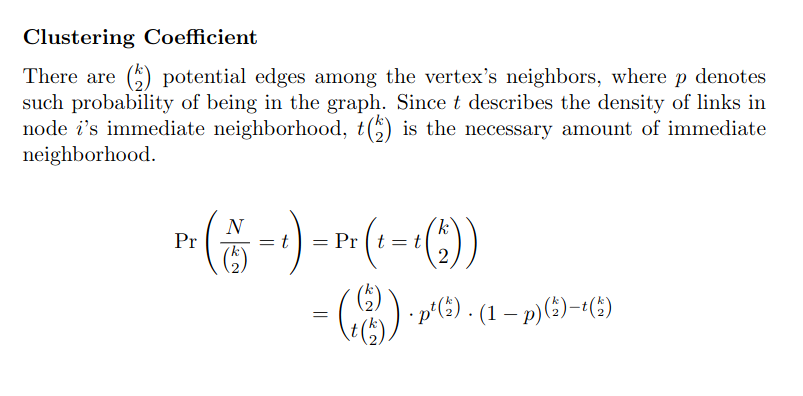

In [18]:
def prob12b(N, p, k, t):
    """Returns the probability of a vertex with degree k to have a
    clustering coefficient t in a random network of N nodes with a
    probability p per possible edge to be present in the network."""
    a = int(binom_coefficients(k, 2))
    b = p ** (t * a)
    c = (1 - p) ** (a - t * a)
    d = binom_coefficients(a, int((t / a) * a))
    return a * b * c * d

In [19]:
assert isinstance(prob12b(10, 0.2, 3, 2), float), "Your function should return a float"

### 1.2 c. Expected local clustering coefficient (7 points)
Explain why the expression for the expected local clustering coefficient for a vertex in the entire network equals $\sum_{k=2}^{N-1} P(k) \cdot \sum_{i=0}^{k(k-1)/2} \frac{i}{k(k-1)/2} \cdot \textrm{Binom}\left[i; k(k-1)/2,p\right]$ where the binomial distribution is given by: $Pr(k; n, p) = Pr(X = k) = \binom{n}{k}p^k(1-p)^{n-k}$.

Compute the expected local clustering coefficient for a vertex by summing over all possible degrees in the network. Within each degree, we consider all possible neighborhood configurations up to a maximum threshold tmax. Within these configurations, we identify the clustering neighbors and multiply by the probability of an edge existing between two nodes. 

### 1.2 d. Simplify expression (7 points)
Use the expression from [1.2 c](#1.2-c.-Expected-local-clustering-coefficient-(7-points)) to prove that the expected clustering coefficient actually simply equals $p$.

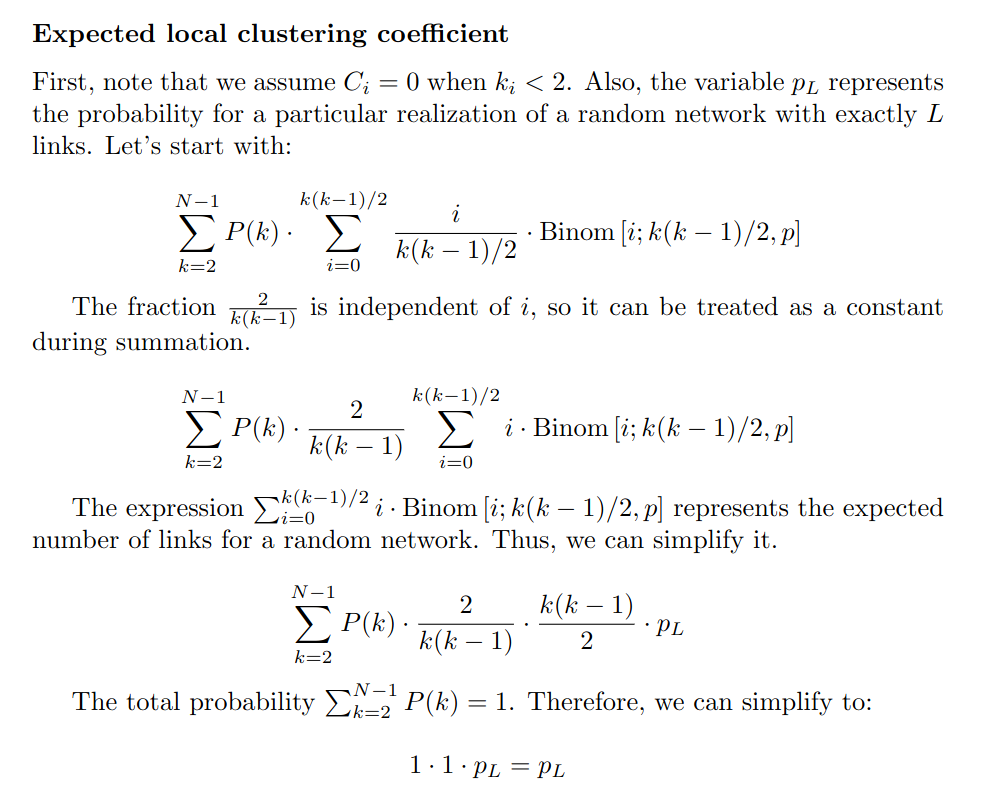

### 1.2 e. Expected degree (2 points)
Suppose you pick a random vertex from the network. What is the expected degree of this vertex, denoted $\langle k \rangle$? Explain briefly why.

First derive and explain your answer, and then enter it in the code cell.

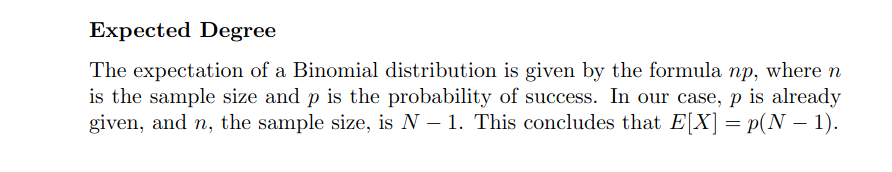

In [20]:
def prob12e(N, p):
    """Returns the expected degree of a vertex in a random
    network of N nodes with a probability p per possible edge
    """
    return p * (N - 1)

In [21]:
assert isinstance(prob12e(10, 0.2), float), "Your function should return a float"

## 1.3 Sand avalanche
Consider a random and a scale-free network with $N$ nodes. Assume that each node represents a _bucket_ that can hold as many sand grains as the node degree. The evolution of these networks happens as follows:

- Each time step a grain of sand is added to a random stable bucket.
- If the number of grains of sand becomes equal to the bucket size (which is the degree of the node), the bucket topples and becomes unstable. This means that one grain of sand is added to every (stable) neighbor.
- These neighboring buckets can topple themselves and become unstable as well. This all happens in the same time step. The total number of buckets that toppled during this time step is s.

Note: once a bucket becomes unstable, it stays unstable for the rest of the simulation, thus during subsequent time steps as well. You can ignore incoming grains to unstable nodes.

Additionally, each time a grain of sand should be added to a bucket, there is a probability $\ell$ that this does not happen and the grain disappears. You can consider $\ell$ to be the fraction of the grains that are "lost in transfer".

### 1.3 a. Erdős–Rényi model (8 points)
Generate a random network of $N=10^3$ nodes and average degree $\langle k \rangle = 2$ with the Erdős–Rényi model in `graphs.py` by completing the function `sand_avalanche`. Simulate the above process for $10^4$ time steps. Assume that at each time step a fraction $\ell = 10^{-4}$ of sand grains gets lost in transfer, to make sure the node buckets do not become saturated with sand. Plot the *avalanche distribution* $p$, where $p(s)$ is the probability that an avalanche contains $s$ toppled buckets, in `plot_avalanche_distribution` and insert it in this notebook.

We already provided you with some example code on how to generate a random network in NetworkX in the function `example_graph`. You might want to take a look at the NetworkX [tutorial](https://networkx.org/documentation/stable/tutorial.html) and the [reference page](https://networkx.org/documentation/stable/reference/functions.html).

INSERT PLOT HERE

To insert an image, choose Edit→Insert Image.

### 1.3 b. Configuration model (8 points)
Repeat the experiment of [1.3 a](#1.3-a.-Erd%C5%91s%E2%80%93R%C3%A9nyi-model-(8-points)), but this time with a scale-free network using a [configuration model](http://networksciencebook.com/chapter/4#generating-networks). To do this, extend the function `sand_avalanche` to use a scale-free network if the `scalefree` parameter is set and complete the function `plot_avalanche_distribution_scalefree` in `graphs.py`. You can use the `scalefree_graph` function to generate a scale-free graph.

INSERT PLOT HERE

To insert an image, choose Edit→Insert Image.

### 1.3 c. Comparing the distributions (3 points)
Compare both distributions. Explain their differences.

YOUR ANSWER HERE

# 2. Epidemic spreading
Epidemic spreading on networks have been studied a lot in the past few decades. This research started with epidemics on random (Erdős–Rényi) networks and then progressed to other models of networks, mostly Barabasi (‘scale-free’) networks and Watts-Strogatz (‘small-world’). Most studies focused on situations where an ODE (‘mean-field’) approximation would no longer yield accurate results, since otherwise Occam's razor tells us that we should prefer the ODE model over the networked model. In this assignment, you will investigate an example such situation for yourself, answering some theoretical questions as well as performing computer simulations.

Note: when we say ‘epidemics’, this might naturally suggest infectious diseases. However, the term is used more broadly to represent all kinds of ‘spreading phenomena’ which also includes spreading of, for example, gossip in online social networks, water in rock cavities, information in sensor networks, or a memo in an organisation.

## 2.1 Susceptible-Infected model
We begin by modelling an epidemic using a network, using the simplest model possible, the so-called SI (Susceptible-Infected) model. As you may have guessed, the model consists of two types of vertices; the vertices could, for example, represent humans, rats, wireless sensors in a dyke or cavities in a rock.

A vertex in the ‘susceptible’ state changes to the ‘infected’ state if (at least) one of its neighbours infects it. A vertex in the ‘infected’ state will, for each time step, infect a neighbour vertex with a probability of $i$ for each neighbour.

Let us denote the total number of susceptible vertices as $S$ and the total number of infected vertices as $I$. Naturally, $I + S = N$ at all times. In epidemiology jargon, $I(t)$ is referred to as ‘prevalence’ of the epidemic at time step $t$.

### 2.1 a. Infection probability (3 points)
Suppose that a susceptible vertex has $r$ infected neighbours in a certain time step. What is the probability that the vertex is not infected in the next time step? What is the probability that it *does* become infected?

In [22]:
def prob21a(i, r):
    not_infected = (1 - i) ** r
    infected = 1 - not_infected
    return not_infected, infected

In [23]:
_r = prob21a(0.01, 3)
assert isinstance(_r, tuple) and len(_r) == 2 \
    and isinstance(_r[0], float) and isinstance(_r[1], float), \
    "Your function should return a tuple of two floats"

### 2.1 b. Random network (10 points)
Implement this model for random (Erdős–Rényi) networks in the `susceptible_infected` function in `graphs.py`. Seed the simulation by infecting 0.1% random vertices. Then plot two figures, one with 50 timesteps and one with 500 timesteps, in the function `plot_susceptible_infected` with the expected evolution of $I/N$ (i.e. normalised  ‘prevalence’) over time for two cases: (*i*) $N=10^5, i=0.01, \langle{k}\rangle=5.0$, and (*ii*) $N=10^5, i=0.1, \langle{k}\rangle=0.8$. Note that we want to see the *expected* behaviour, so you'll need to average over enough simulations for each case to get a smooth curve, preferably including confidence intervals or error bars.

<small>You will be able to verify your implementation later using the mean-field approximation.</small>

INSERT PLOT WITH 500 TIME STEPS HERE

To insert an image, choose Edit→Insert Image.

INSERT PLOT WITH 50 TIME STEPS HERE

To insert an image, choose Edit→Insert Image.

### 2.1 c. Prediction (2 points)
We can see that, initially, one case grows faster than the other. Could we have predicted this beforehand, by looking only at the values $N,i,\langle{k}\rangle$?

Each time step, infection will spread at a rate proportional to $i \cdot \langle k \rangle$. For the second case, this product is bigger. 

### 2.1 d. Opposing forces (2 points)
We see two ‘opposing forces’, namely a higher infection probability but a lower connectivity, so it is not so clear at first sight. Let's look more closely. In the early phase of the epidemic, it is highly likely that all neighbours of an infected vertex are susceptible. Assume this is the case, and write the expression for the probability that a vertex with (say) $\langle{k}\rangle$ edges infects at least one neighbour.

In [24]:
def prob21d(i, k):
    return i * k

In [25]:
assert isinstance(prob21d(0.01, 4), float), "Your function should return a float"

### 2.1 e. Verification (1 point)
Calculate this probability by hand in each of the two cases for the first time step using the $\langle{k}\rangle$. Check this result by comparing it to the initial ordering of the two curves for question [2.1 b](#2.1-b.-Random-network-(10-points)) (i.e., which of the two curves is above the other one in the early steps of the simulation). Does the ordering correspond?

Case (i):
P = 0.01 * 5.0 = 0.05

Case (ii):
P = 0.1 * 0.8 = 0.08

### 2.1 f. Calculate R<sub>0</sub> (3 points)
Derive (analytically) the expression for the expected number of new infections in the first time step *per infected vertex* in both cases, i.e. $$I'(t)/I(t) = \left(I(t+1)-I(t)\right)/I(t).$$ This number is called the ‘reproduction number’ in epidemiology and often denoted as the currently well known $R_0$.

First derive your solution and then enter it in the code cell.

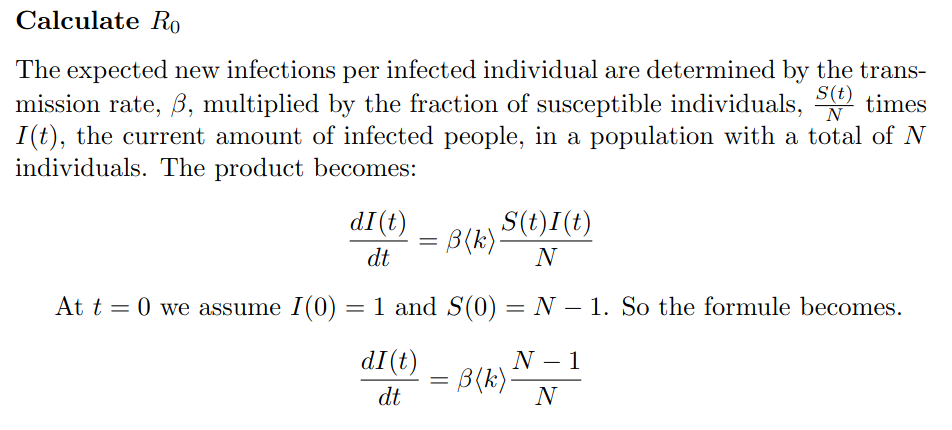

In [26]:
def reproduction_number(N, k, i):
    return k * i * (N - 1 / N)

In [33]:
assert isinstance(reproduction_number(100, 3, 0.002), float), "Your function should return a float"

### 2.1 g. Faster spreading (2 points)
Use the ratio of the two reproduction numbers to quantify exactly how much faster/slower case (*i*) is expected to grow compared to case (*ii*) in the beginning.

Case (i):
ratio = $ 5.0 * (10^5 = 0.05 $

Case (ii):
ratio = 0.1 * 0.8 = 0.08

### 2.1 h. Approximate R<sub>0</sub> over time (7 points)
Can you visually verify the absolute value of this ratio for question [2.1 g](#2.1-g.-Faster-spreading-(2-points)) using your numerical results? Try it by completing `plot_approximate_R0` in `graphs.py` and plotting one figure with two curves which approximate the $R_0$ over time for each case, using your numerically calculated (averaged) $I(t)$.

Does it seem to correspond well, in the beginning? (If your curves are too jumpy, run additional simulations for better averaging.)

INSERT PLOT HERE

To insert an image, choose Edit→Insert Image.

YOUR ANSWER HERE

### 2.1 i. Plot analysis (5 points)
Why do these curves drop off to zero? And why does the top curve drop to zero faster than the bottom one?

YOUR ANSWER HERE

### 2.1 j. Final phase (3 points)
Now, we want to consider the final phase of the two epidemics. In your figure for question [2.1b](#2.1-b.-Random-network-(10-points)), we see that they settle to different final outbreak sizes. Explain, based on graph theory, why you would expect this to happen.

YOUR ANSWER HERE

### 2.1 k. To infinity <small>and beyond!</small> (4 points)
As $N \rightarrow \infty$, how will both final outbreak sizes grow as function of $N$? Your answer may omit constants. (You may also use big-O notation if you wish.)

YOUR ANSWER HERE

## 2.2 Creating a mean-field approximation
Let's try making a mean-field approximation of these two epidemic models. We'll need to remove any ‘spatial’ structure that the network induces. We can easily do this by making the network complete, so that all $N(N-1)/2$ edges are present.

Then, we could approximate how $I(t)$ and $S(t)$ behave over time using the following (continuous-time, continuous-state) coupled ODE:

$$\begin{eqnarray}
\frac{dI}{dt} = \left(1-(1-b)^{I(t)}\right) \cdot S(t), \\
\frac{dS}{dt} = -\left(1-(1-b)^{I(t)}\right) \cdot S(t).
\end{eqnarray}$$

We want our models to be the same as those from Question 1, so we'll use the same values for $N$, and use the following (equivalent)
initial conditions:

$$\begin{eqnarray}
I(0) = 0.001N, \\
S(0) = N-0.001N.
\end{eqnarray}$$

### 2.2 a. Difference in parameters (5 points)
The first thing to note is that there is now a $b$ parameter which is *not* equivalent to the $i$ parameter above. That is, we cannot simply set $b=i$ and then expect that this ODE will be an approximation of the networked models above. Explain briefly why.

YOUR ANSWER HERE

### 2.2 b. Deriving an expression for b (5 points)
To make the ODE approximate the networked models above, we need to compute a value for $b$, based on $i$. We can require that the two models will have the same behaviour in the beginning, by making the initial values of $R_0$ equal, using this equation:

$$\begin{equation}
\left(1-(1-b)^{I}\right) \cdot S = \left(1-(1-i)^{\frac{\langle{k}\rangle}{N}I}\right) \cdot S.
\end{equation}$$

Derive the expression for $b = ...$ from this equation. First show how you derived your solution, and then enter it in the code cell.

YOUR ANSWER HERE

In [ ]:
def expr22b(N, avg_k, i):
    b = ...  # YOUR ANSWER HERE
    return b

In [ ]:
assert isinstance(expr22b(1000, 2.5, 0.01), float), "Your function should return a float"

Using this expression we can compute the two numerical values corresponding to the above two networked cases:

In [ ]:
print(f"case (i):  b = {expr22b(10 ** 5, 5.0, 0.01):.2e}")
print(f"case (ii): b = {expr22b(10 ** 5, 0.8, 0.1):.2e}")

If you failed to derive $b$ from $i$, you can use the values $b=5.00\cdot 10^{-7}$ for case (*i*) and $8.40 \cdot 10^{-7}$ for case (*ii*) instead, for the remaining questions.

## 2.3 Evaluating mean-field approximation
Now, we want to evaluate whether our mean-field approximation sufficiently represents the original models.

### 2.3 a. Extending Eulers algorithm & comparing ODE to simulation (10 points)
In the previous assignment (ODEs) of this course you should have implemented the Euler algorithm for numerically approximating the solution of an ODE. Copy-paste your solution from the previous assignment into the function `euler` in `graphs.py` and extend it to support a coupled ODE of two functions (namely, $I$ and $S$). Finish `approximate_ODE` so you can approximate the ODE using your extended euler function.

Finish `plot_compare_ode_simulation` to show one figure with four curves. Start with the two from question [2.1 b](#2.1-b.-Random-network-(10-points)); the other two should be your numerically approximated solutions for the ODEs that correspond to these two networked cases. Clearly distinguish the ODE approximations from the network results, and make them as accurate as possible.

INSERT PLOT HERE

To insert an image, choose Edit→Insert Image.

### 2.3 b. Analysing results (5 points)
If you did everything correctly, then the ODE should approximate one case relatively well, but the other case should deviate more significantly, at least in the final phase. Explain (briefly) what could cause the difference.

YOUR ANSWER HERE

### 2.3 c. Type of growth (5 points)
Looking at the previous figure, it looks like both the ODE and the random network model have an initial phase of a certain type of growth of the prevalence. Explain what type of growth it is, and justify your answer using the formulas.

YOUR ANSWER HERE

## 2.4 Scale-free network
One of the parameter values $N,i,\langle{k}\rangle$ from [2.1](#2.1-b.-Random-network-(10-points)) gives us an Erdős–Rényi network model with a giant component.
Instead of using Erdős–Rényi for the model using these parameters, we can try using the *scale-free network* model instead.

### 2.4 a. Creating a scale-free network (4 points)
For the $N,i,\langle{k}\rangle$ for which a giant component exists in the Erdős–Rényi network model, repeat the simulations, using the *scale-free network* model instead, using exponent $\gamma = 2.5$. Do this by extending the `susceptible_infected` function in `graphs.py` to use a scale-free network if the `scalefree` parameter is set (use `scalefree_graph` to create one). Then implement `plot_normalised_prevalence_scalefree` to show one figure in which you compare the ‘scale-free’ case with the ‘random’ case.

INSERT PLOT HERE

To insert an image, choose Edit→Insert Image.

### 2.4 b. Evaluating results (2 points)
Can you explain the difference in the shape of the prevalence curve?

YOUR ANSWER HERE

### 2.4 c. Looking at the average degrees (8 points)
Extend the function `susceptible_infected` to, if the parameter `avg_degree` is set, keep track of the average degree of all newly infected vertices for every timestep and return that instead of the amount of infected vertices. Then implement `plot_average_degree` to show one figure with the average degree of the newly infected vertices for both the ‘scale-free’ case and the ‘random’ case. Make sure both curves are clearly visible!

INSERT PLOT HERE

To insert an image, choose Edit→Insert Image.

### 2.4 d. Typical spreading (2 points)
Based on your figure, what can you say about how the epidemic typically spreads through a scale-free network and through a random network?

YOUR ANSWER HERE